# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

# Step 1 : Reading DATA

In [2]:
#read the data
bikesharing_df=pd.read_csv("day.csv")
bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesharing_df.shape

(730, 16)

In [4]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bikesharing_df['season'] = bikesharing_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4:'winter'})
bikesharing_df['weathersit'] = bikesharing_df['weathersit'].map({1: 'clear', 2: 'Mist', 3: 'Light Snow', 4:'Heavy Rain'})
#bikesharing_df['weekday'] = bikesharing_df['weekday'].map({1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Sataurday'})

bikesharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 2 : Data Visualization

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/shaheenashaik/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


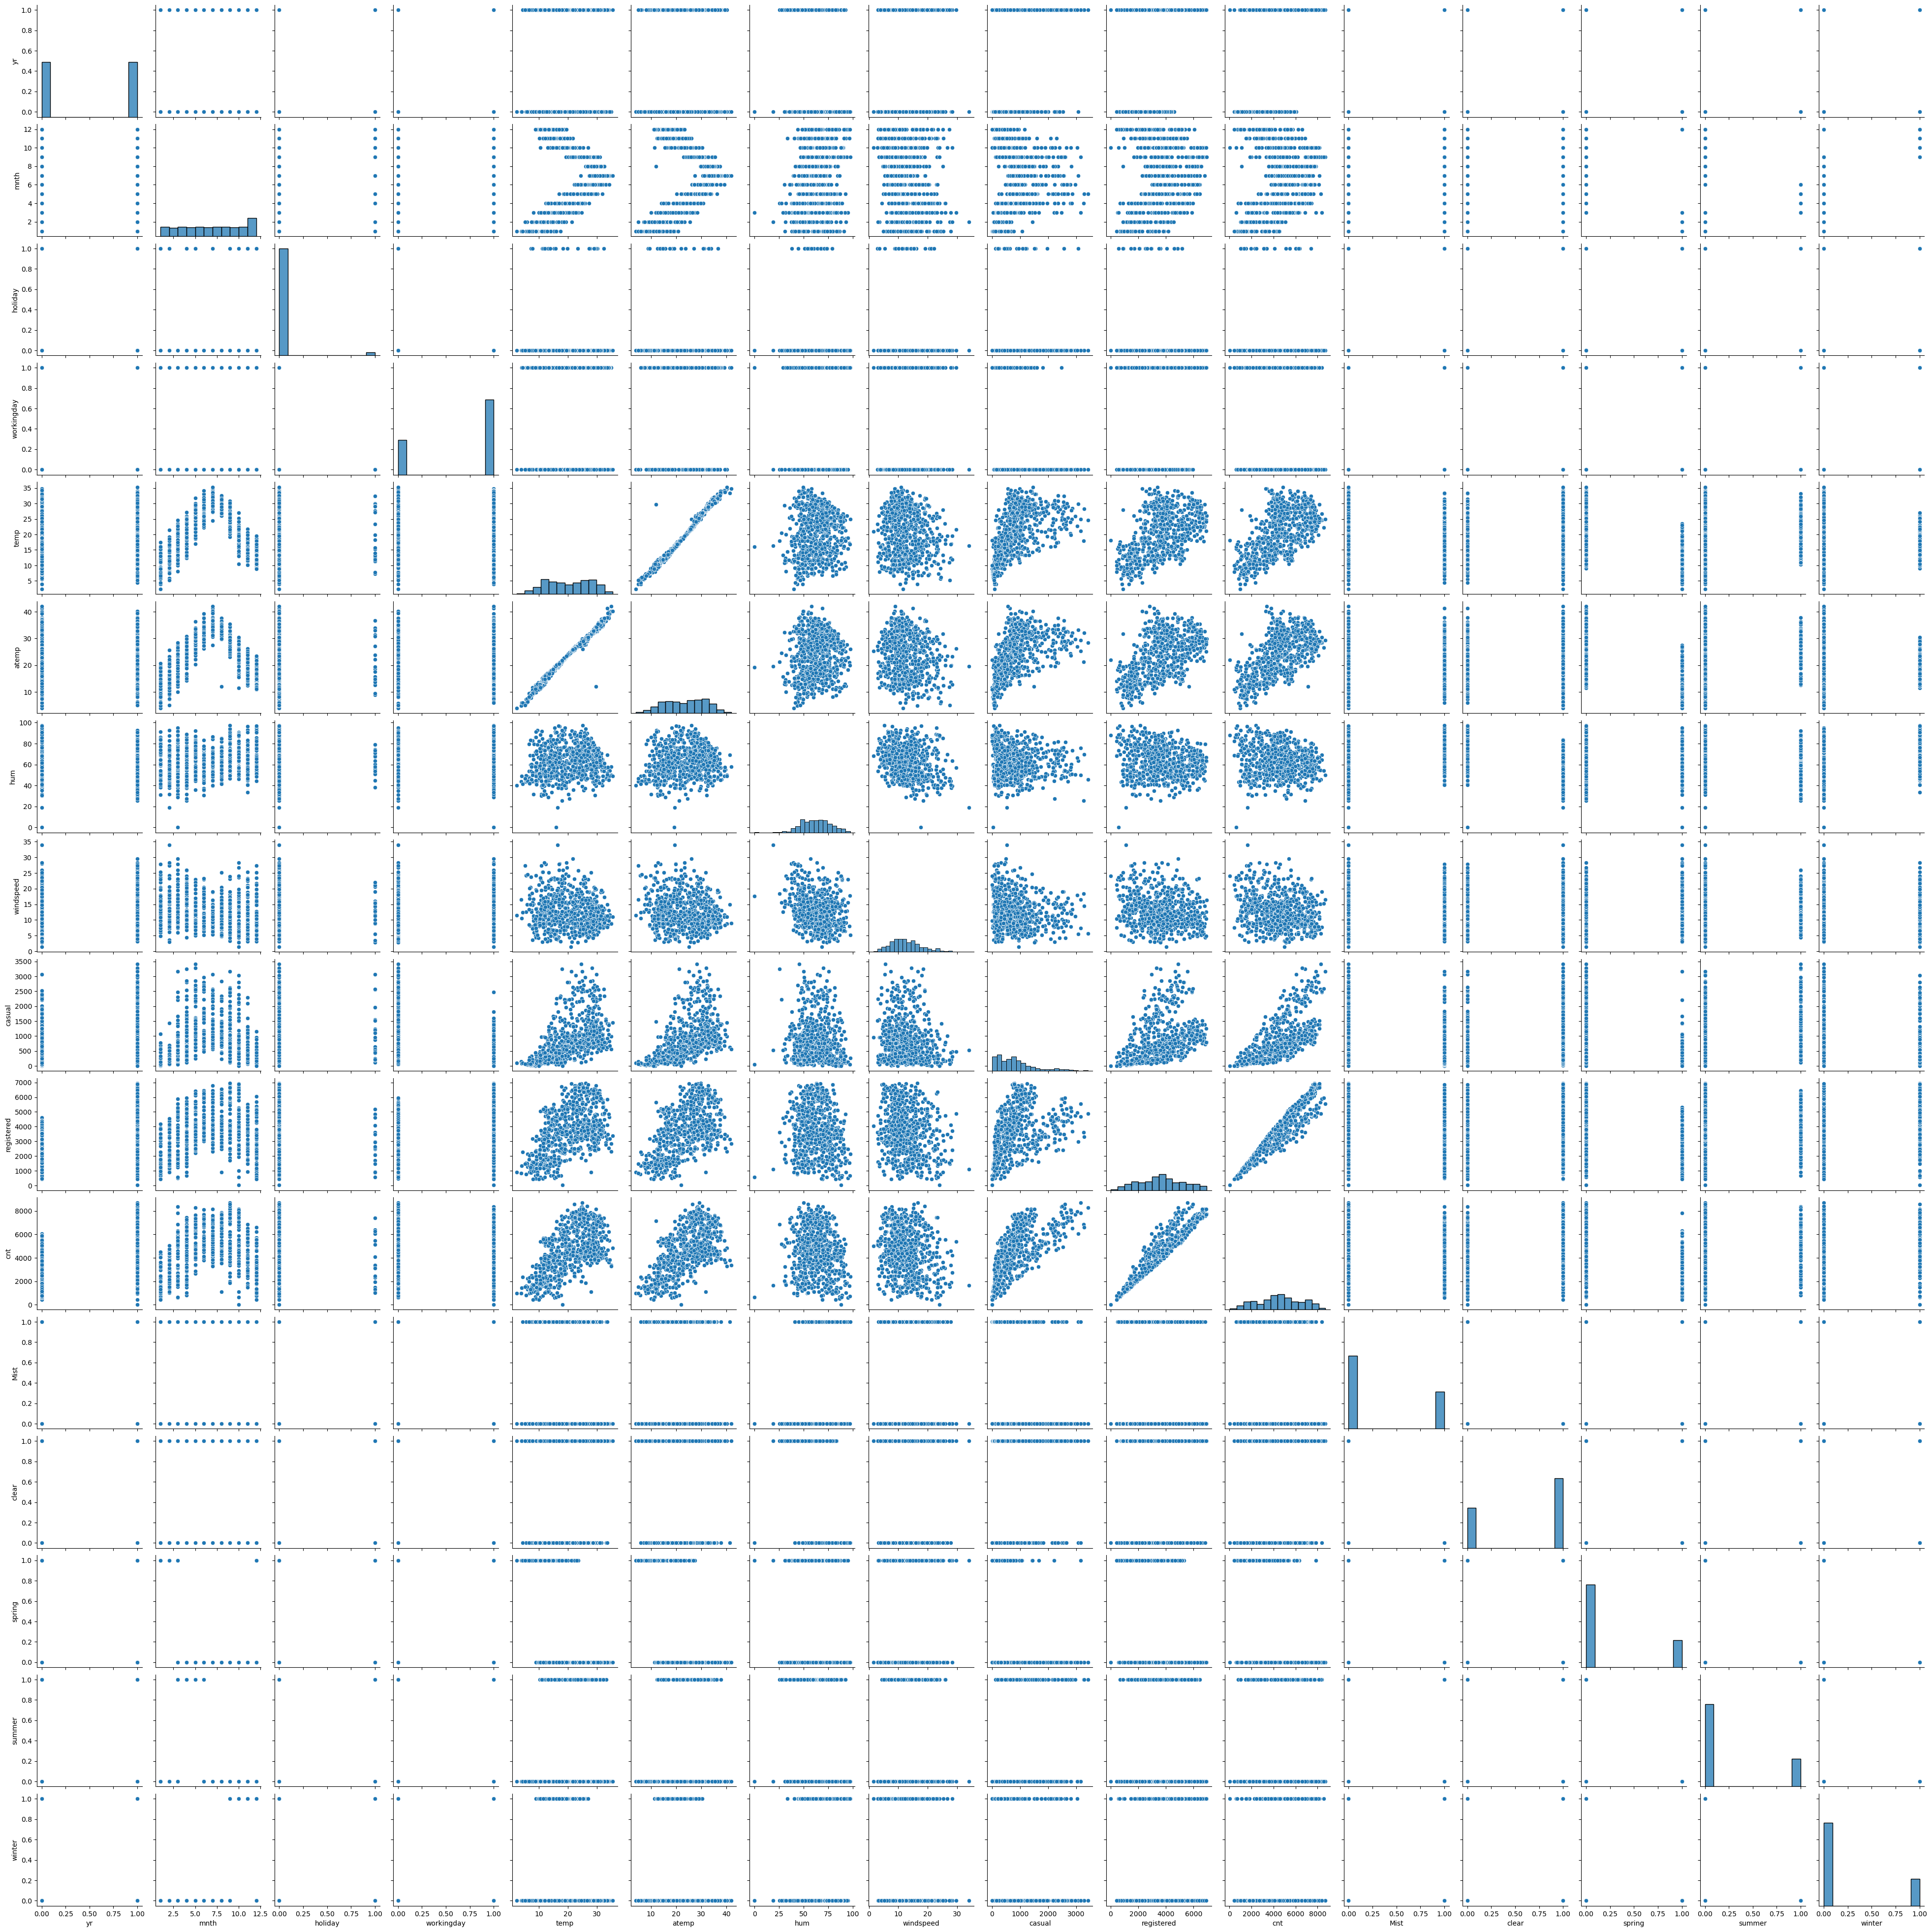

In [57]:
#Visualising numeric variables
sns.pairplot(bikesharing_df)
plt.show()

# Step 3 : Data Cleaning

In [58]:
#Visualizing Categorical variables

plt.figure(figsize=(10,8))
sns.boxplot(x='season', y='cnt', data=bikesharing_df)

ValueError: Could not interpret input 'season'

<Figure size 1000x800 with 0 Axes>

In [ ]:
#Visualizing Categorical variables

plt.figure(figsize=(10,8))
sns.boxplot(x='weathersit', y='cnt', data=bikesharing_df)

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bikesharing_df)

plt.subplot(2,3,2)
sns.boxplot(x='weathersit', y='cnt', data=bikesharing_df)

plt.subplot(2,3,3)
sns.boxplot(x='weekday', y='cnt', data=bikesharing_df)

plt.subplot(2,3,4)
sns.boxplot(x='workingday', y='cnt', data=bikesharing_df)

plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='cnt', data=bikesharing_df)

plt.subplot(2,3,6)
sns.boxplot(x='yr', y='cnt', data=bikesharing_df)


plt.show()

In [ ]:
#Visualizing Categorical variables

plt.figure(figsize=(10,8))
sns.boxplot(x='holiday', y='cnt', data=bikesharing_df)

In [ ]:
# Dropping the date column as we already have the year

bikesharing_df = bikesharing_df.drop('dteday', axis=1)
bikesharing_df = bikesharing_df.drop('instant', axis=1)
bikesharing_df = bikesharing_df.drop('weekday', axis=1)


## Step 4 : Preparing the data for modelling(Train test split)
- Encoding
   - converting binary value to 1/0
   - Other categorical vars to dummy vars

In [ ]:
# creating dummy variables for furnishingstatus
# dropping a redundant dummy var

weather=pd.get_dummies(bikesharing_df['weathersit'], drop_first=True)
weather.head()
bikesharing_df=pd.concat([bikesharing_df, weather], axis=1)
bikesharing_df

In [ ]:
# creating dummy variables for furnishingstatus
# dropping a redundant dummy var

seasons=pd.get_dummies(bikesharing_df['season'], drop_first=True)
bikesharing_df=pd.concat([bikesharing_df, seasons], axis=1)
bikesharing_df

In [ ]:
# creating dummy variables for furnishingstatus
# dropping a redundant dummy var

#week_days=pd.get_dummies(bikesharing_df['weekday'], drop_first=True)
#bikesharing_df=pd.concat([bikesharing_df, week_days], axis=1)
#bikesharing_df

In [ ]:
bikesharing_df=bikesharing_df.drop('weathersit', axis=1)
bikesharing_df=bikesharing_df.drop('season', axis=1)
#bikesharing_df=bikesharing_df.drop('weekday', axis=1)

bikesharing_df.head()


## STEP 5 : Splitting into train and test


In [ ]:
bikesharing_df_train, bikesharing_test_df= train_test_split(bikesharing_df, train_size=0.7,random_state=100)
print(bikesharing_df_train.shape)
print(bikesharing_test_df.shape)

Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling (Normalization) between 0 and 1
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [ ]:
#Normalization
#(x-xmin)/(xmax-xmin)

#Standaardization
# (x-mu)/sigma

# 1. Instantiate an object
scaler=MinMaxScaler()

num_vars=['temp', 'atemp', 'hum', 'windspeed']

# 2. Fit on data
bikesharing_df_train[num_vars]=scaler.fit_transform(bikesharing_df_train[num_vars])
bikesharing_df_train.head()



## Step 6 : Training the Model


In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(bikesharing_df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
# X_train y train
y_train=bikesharing_df_train.pop("cnt")
X_train=bikesharing_df_train

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['yr']])

# Create a first fitted model
lr= sm.OLS(y_train, X_train_lm)
lr_model=lr.fit()
lr_model.summary()

In [ ]:
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(lm,step=10)
rfe=rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

# STEP 7 : Building model using statsmodel, for the detailed statistics

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [ ]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

## Step 8 : Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_cnt = lm.predict(X_train_lm)

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label



In [ ]:
## Making Predictions

#### Applying the scaling on the test sets

In [ ]:
num_vars=['temp', 'atemp', 'hum', 'windspeed']

bikesharing_test_df[num_vars] = scaler.transform(bikesharing_test_df[num_vars])

#### Dividing into X_test and y_test

In [ ]:
y_test = bikesharing_test_df.pop('cnt')
X_test = bikesharing_test_df

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9 : Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [ ]:
r2_score(y_true=y_test,y_pred=y_pred)

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7944

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.